<a href="https://colab.research.google.com/github/aseemdandgaval/EDA-Salaries/blob/main/EDA_Industy_Salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis: Data Professionals' Salaries in 2022**

* This project is about an Exploratory Data Analysis on the salaries of working professionals in the data industry in India (2022).
* The dataset is taken from **kaggle**, it is made by the author by scraping **Glassdoor**, which is a wesbite that allows users to anonymously access and publish information about compabies, jobs, salaries and more.
* The dataset contains information about the companies, salaries, locations and job titles of the professionals.
* The goal of this project is to do an **analysis of the data**, **extract information**, **visualize the data** by plotting charts and graphs for easier understanding and finally **gather some insights and make inferences**.
* This will be done using Python and some of its libraries like **Pandas**, **NumPy**, **MatplotLib**, **Seaborn** and more.



## **Importing the neccessary libraries**

In [ ]:
!pip install opendatasets --upgrade --quiet
!pip install jovian --upgrade -q

import os
import jovian
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import opendatasets as od
import matplotlib.pyplot as plt
from wordcloud import WordCloud

     |████████████████████████████████| 68 kB 2.1 MB/s 


In [ ]:
# Setting parameters and styles for graphs

%matplotlib inline

sns.set_style('whitegrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## **Downloading the Dataset**

* The first thing to do before starting the data analysis is to retrive the dataset, here its being done using the `opendatasets` library.

In [ ]:
# Change this
dataset_url = 'https://www.kaggle.com/iamsouravbanerjee/analytics-industry-salaries-2022-india' 
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aseemdandgaval
Your Kaggle Key: ··········


100%|██████████| 56.7k/56.7k [00:00<00:00, 9.42MB/s]

* The dataset has been downloaded and extracted.

## **Checking, Prepping and Cleaning the Dataset**




### **Checking the Dataset**

* The next step is to see the dataset by loading it into a `DataFrame` using pandas.
* This is the part where we check the dataset, look how many rows and columns it has, what each of the columns contain or represent and also check the range of values.


In [ ]:
salaries_df = pd.read_csv('/content/analytics-industry-salaries-2022-india/Salary Dataset.csv')

In [ ]:
salaries_df

,Company Name,Job Title,Salaries Reported,Location,Salary
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr"
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr"
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr"
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr"
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr"
...,...,...,...,...,...
4339,TaiyōAI,Machine Learning Scientist,1.0,Mumbai,"₹5,180/mo"
4340,Decimal Point Analytics,Machine Learning Developer,1.0,Mumbai,"₹7,51,286/yr"
4341,MyWays,Machine Learning Developer,1.0,Mumbai,"₹4,10,952/yr"
4342,Market Pulse Technologies,Software Engineer - Machine Learning,1.0,Mumbai,"₹16,12,324/yr"


In [ ]:
salaries_df.shape

(4344, 5)

In [ ]:
salaries_df.columns

Index(['Company Name', 'Job Title', 'Salaries Reported', 'Location', 'Salary'], dtype='object')

In [ ]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company Name       4341 non-null   object 
 1   Job Title          4344 non-null   object 
 2   Salaries Reported  4342 non-null   float64
 3   Location           4344 non-null   object 
 4   Salary             4344 non-null   object 
dtypes: float64(1), object(4)
memory usage: 169.8+ KB


* So the dataset has **4344 rows** and **5 columns**.
* The columns contain information of the **Company Name**, **Job Title**, **Salaries Reported**, **Location** and the **Salary** of the working professional.
* The Salary column will need to be prepped and converted into a number (float64) instead of a pandas object.

### **Cleaning the data**

* It is very important to also know what data is **incorrect and/or missing** from the dataset .
* Missing data is **very common** in real world datasets.
* There might be a typing mistake, the person might have forgotten to input the data or there might be a valid reason to not enter the values at some locations.


In [ ]:
salaries_df.isnull().sum()

Company Name         3
Job Title            0
Salaries Reported    2
Location             0
Salary               0
dtype: int64

* This dataset is **very clean**, and only 5 values are missing out of 4300~.
* Generally, if a significant amount of data is missing, we can replace it by using a bunch of techniques.
* Since only 5 values are missing, we can just **remove the associated colums altogether**, and this will not affect the analysis at all.

In [ ]:
# Checking the rows for missing values

salaries_df.loc[salaries_df['Salaries Reported'].isna()]

,Company Name,Job Title,Salaries Reported,Location,Salary
4027,First Student Data Scientist,Data Analyst,NaN,Pune,"₹4,53,300/yr"
4237,Amazon,Machine Learning Data Associate II,NaN,New Delhi,"₹3,29,439/yr"


In [ ]:
salaries_df.loc[salaries_df['Company Name'].isna()]

,Company Name,Job Title,Salaries Reported,Location,Salary
2279,NaN,Data Analyst,1.0,Pune,"₹23,500/mo"
3227,NaN,Data Engineer,1.0,Pune,"₹26,20,604/yr"
4026,NaN,Machine Learning Engineer/Data Scientist,1.0,Pune,"₹56,465/mo"


In [ ]:
# Dropping the unwanted rows

salaries_df.dropna(subset = ['Salaries Reported'], inplace=True)
salaries_df.dropna(subset = ['Company Name'], inplace=True)

In [ ]:
salaries_df.shape

(4339, 5)

* The unwanted rows are now removed from the dataset.

### **Prepping the Dataset**

**Prepping the 'Salary' Column**

In [ ]:
salaries_df

,Company Name,Job Title,Salaries Reported,Location,Salary
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr"
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr"
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr"
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr"
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr"
...,...,...,...,...,...
4339,TaiyōAI,Machine Learning Scientist,1.0,Mumbai,"₹5,180/mo"
4340,Decimal Point Analytics,Machine Learning Developer,1.0,Mumbai,"₹7,51,286/yr"
4341,MyWays,Machine Learning Developer,1.0,Mumbai,"₹4,10,952/yr"
4342,Market Pulse Technologies,Software Engineer - Machine Learning,1.0,Mumbai,"₹16,12,324/yr"


* In this dataset, the salaries are very important.
* The salaries are not in one currency.
* Some are in **Rupees(₹)**, some in **Pounds(£)** and some in **Dollars($)**.
* Also some salaries are given **per month** and some are given **yearly**.
* The salaries will need to be converted into **Rupees per year**, so that we can make inferences and insights much easier and that are accurate.

In [ ]:
# Extracting and splitting the currency, duration and the salary amount from the Salary column

salaries_df['Currency'] = salaries_df['Salary'].str.slice(start=0,stop=1)
salaries_df['Duration'] = salaries_df['Salary'].str.split("/", n=1, expand=True)[1]
salaries_df['Amount'] = salaries_df['Salary'].str.split("/", n=1, expand=True)[0].str.slice(start=1)

In [ ]:
# Converting the salaries to float64 and removing the commas

salaries_df['Amount'] = salaries_df['Amount'].str.replace(',', '')  
td = salaries_df.loc[salaries_df["Currency"]=="A"].index
salaries_df = salaries_df.drop(td, axis=0)

salaries_df['Amount'] = salaries_df['Amount'].astype(float)

In [ ]:
salaries_df['Currency'].unique()

array(['₹', '$', '£'], dtype=object)

In [ ]:
# Converting all salaries to Ruppees/Year

salaries_df['Amount'].loc[salaries_df['Duration']=='mo'] = salaries_df['Amount'] * 12
salaries_df['Amount'].loc[salaries_df['Duration']=='hr'] = salaries_df['Amount'] * 12 * 40

salaries_df['Amount'].loc[salaries_df['Currency']=='£'] = salaries_df['Amount'] * 102.19
salaries_df['Amount'].loc[salaries_df['Currency']=='$'] = salaries_df['Amount'] * 75.35

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
salaries_df

,Company Name,Job Title,Salaries Reported,Location,Salary,Currency,Duration,Amount
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",₹,yr,648573.0
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr",₹,yr,1191950.0
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr",₹,yr,836874.0
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr",₹,yr,669578.0
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr",₹,yr,944110.0
...,...,...,...,...,...,...,...,...
4339,TaiyōAI,Machine Learning Scientist,1.0,Mumbai,"₹5,180/mo",₹,mo,62160.0
4340,Decimal Point Analytics,Machine Learning Developer,1.0,Mumbai,"₹7,51,286/yr",₹,yr,751286.0
4341,MyWays,Machine Learning Developer,1.0,Mumbai,"₹4,10,952/yr",₹,yr,410952.0
4342,Market Pulse Technologies,Software Engineer - Machine Learning,1.0,Mumbai,"₹16,12,324/yr",₹,yr,1612324.0


* Finally, all the salaries are in **Rupees per year** and have been converted to **floats**.

In [ ]:
# Removing uneccesary columns

salaries_df = salaries_df[['Company Name',
                          'Job Title',
                          'Salaries Reported',
                          'Location',
                          'Amount'
                        ]]
                        
salaries_df['Salary'] = salaries_df['Amount']
salaries_df = salaries_df.drop(columns=['Amount'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


**Prepping the 'Job Title' column**

In [ ]:
salaries_df['Job Title'].unique()

array(['Data Scientist', 'Data Science Associate',
       'Data Science Consultant', 'Data Science', 'Senior Data Scientist',
       'Junior Data Scientist', 'Lead Data Scientist',
       'Data Science Manager', 'Data Scientist - Trainee',
       'Data Science Lead', 'Data Analyst', 'Data Engineer',
       'Machine Learning Engineer', 'Machine Learning Software Engineer',
       'Software Engineer - Machine Learning',
       'Machine Learning Consultant', 'Machine Learning Data Associate',
       'Machine Learning Data Associate I', 'Machine Learning Associate',
       'Machine Learning Data Associate II',
       'Associate Machine Learning Engineer',
       'Machine Learning Data Analyst',
       'Senior Machine Learning Engineer', 'Machine Learning Scientist',
       'Machine Learning Developer'], dtype=object)

* As you can see, there are a lot of jobs with different titles in the data industry.
* Analysing and visualizing all of these columns at once is not a good approach.
* It would be much better to reduce the number of variables and **categorize similar jobs into their respective sub domains**.


In [ ]:
salaries_df['Field'] = 'Other'
wData =  salaries_df['Job Title'].str.contains("Data")
wScience = salaries_df['Job Title'].str.contains("Science")
wScientist = salaries_df['Job Title'].str.contains("Scientist")
wMachine = salaries_df['Job Title'].str.contains("Machine")
wLearning = salaries_df['Job Title'].str.contains("Learning")
wEngineer = salaries_df['Job Title'].str.contains("Engineer")
wEngineering = salaries_df['Job Title'].str.contains("Engineering")
wAnalyst = salaries_df['Job Title'].str.contains("Analyst")

salaries_df['Field'].loc[wData & (wScience | wScientist) & ~wMachine] = 'Data Science'
salaries_df['Field'].loc[wData & (wEngineer | wEngineering)] = 'Data Engineering'
salaries_df['Field'].loc[wMachine & wLearning & ~(wData & wScientist)] = 'Machine Learning'
salaries_df['Field'].loc[wData & wAnalyst & ~(wMachine | wScientist)] = 'Data Analysis'

salaries_df['Level'] = 'Mid'

wJunior =  salaries_df['Job Title'].str.contains("Junior")
wTrainee = salaries_df['Job Title'].str.contains("Trainee")
wConsultant = salaries_df['Job Title'].str.contains("Consultant")
wSenior = salaries_df['Job Title'].str.contains("Senior")
wLead = salaries_df['Job Title'].str.contains("Lead")
wManager = salaries_df['Job Title'].str.contains("Manager")

salaries_df['Level'].loc[wJunior | wTrainee] = 'Junior'
salaries_df['Level'].loc[wConsultant] = 'Consultant'
salaries_df['Level'].loc[wSenior] = 'Senior'
salaries_df['Level'].loc[wManager| wLead] = 'Manager'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


* Two new columns are created - `Field` (sub domain) and `Level`.
* The **Field column** consists of the subdomains of the industry like data science, machine learning etc. It is made by parsing through the Job Title column. For example, if the title has the words Data and analyst, the subdomain would be Data Analysis.
* The **Level column** consists of the seniority of the professionals like junior, senioir, manager etc. It is made by parsing through the Job Title Column. For example if the job title has the word Manager or Lead, the level would be Manager.

In [ ]:
salaries_df

,Company Name,Job Title,Salaries Reported,Location,Salary,Field,Level
0,Mu Sigma,Data Scientist,105.0,Bangalore,648573.0,Data Science,Mid
1,IBM,Data Scientist,95.0,Bangalore,1191950.0,Data Science,Mid
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,836874.0,Data Science,Mid
3,Impact Analytics,Data Scientist,40.0,Bangalore,669578.0,Data Science,Mid
4,Accenture,Data Scientist,32.0,Bangalore,944110.0,Data Science,Mid
...,...,...,...,...,...,...,...
4339,TaiyōAI,Machine Learning Scientist,1.0,Mumbai,62160.0,Machine Learning,Mid
4340,Decimal Point Analytics,Machine Learning Developer,1.0,Mumbai,751286.0,Machine Learning,Mid
4341,MyWays,Machine Learning Developer,1.0,Mumbai,410952.0,Machine Learning,Mid
4342,Market Pulse Technologies,Software Engineer - Machine Learning,1.0,Mumbai,1612324.0,Machine Learning,Mid


## **Exploratory Analysis, Visualization and Asking Questions**

* Now that the datset has been **cleaned** and **prepped**, it is now time to:
    * Ask important questions to gather some insight.
    * Visualize information by plotting charts and graphs.
    * Analyse and extract information from the dataset.
   

### **Q. Which company hires the most?**

In [ ]:
salaries_df['Company Name'].value_counts().head(10)

Tata Consultancy Services         41
Amazon                            31
Accenture                         30
Google                            27
IBM                               26
Fresher                           26
First Student                     25
Infosys                           23
DONE by NONE                      21
Cognizant Technology Solutions    21
Name: Company Name, dtype: int64

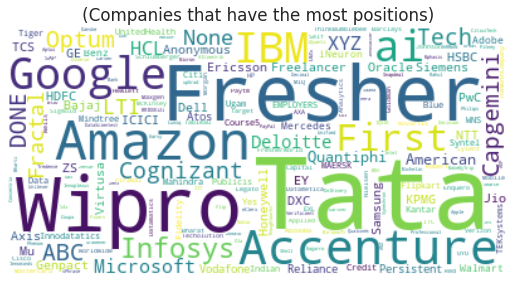

In [ ]:
text = " ".join(cat.split()[0] for cat in salaries_df['Company Name'])
word_cloud = WordCloud(collocations = False,
                       random_state = 10,
                       background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("(Companies that have the most positions)")
plt.show()


* (The word cloud is made from the first word of the companies: Tata - Tata Consultancy Services).
* Looks like companies like **Amazon**, **Google**, **IBM**, **Fresher**, **Tata Consultancy Services** and more are having a lot of positions in the data domain. 


### **Q. What are the different jobs in the data industry?**



In [ ]:
salaries_df['Job Title'].value_counts()

Data Scientist                          1844
Data Analyst                             987
Data Engineer                            804
Machine Learning Engineer                568
Data Science                              43
Senior Data Scientist                     39
Junior Data Scientist                     18
Senior Machine Learning Engineer           9
Lead Data Scientist                        6
Machine Learning Scientist                 2
Machine Learning Consultant                2
Software Engineer - Machine Learning       2
Machine Learning Developer                 2
Data Science Associate                     1
Machine Learning Software Engineer         1
Data Science Consultant                    1
Data Science Lead                          1
Machine Learning Data Associate            1
Machine Learning Data Associate I          1
Machine Learning Associate                 1
Machine Learning Data Associate II         1
Associate Machine Learning Engineer        1
Machine Le

In [ ]:
salaries_df.Field.value_counts()

Data Science        1955
Data Analysis        987
Data Engineering     804
Machine Learning     592
Name: Field, dtype: int64

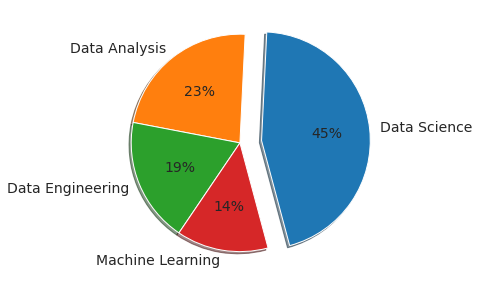

In [ ]:
y = np.array([1955/4338, 987/4338, 804/4338, 592/4338])
mylabels = ["Data Science", "Data Analysis", "Data Engineering", "Machine Learning"]
myexplode = [0.2,0,0,0]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True, startangle = -75, autopct='%.0f%%')
plt.show() 

* As you can see **Data Scientists** are making up the **majority** of the jobs in this industry.
* But actually resposnisbilities of Data Scientists very commonly **overlaps** some or all of the other sub domains.
* For example their work may include some data analysis and then making some machine learning models.
* It is also possible for mutiple job titles to exist for the same work, but that is not very common.

### **Q. What company pays the highest salaries and what are they?**


In [ ]:
salaries_df.sort_values('Salary', ascending = False).head(15)

,Company Name,Job Title,Salaries Reported,Location,Salary,Field,Level
585,MiQ,Data Scientist,1.0,Bangalore,1.711480e+08,Data Science,Mid
3407,Cognizant Technology Solutions,Data Engineer,1.0,Hyderabad,1.226280e+08,Data Engineering,Mid
3285,Datametica,Data Engineer,1.0,Pune,1.037697e+08,Data Engineering,Mid
1115,Saama Technologies,Data Scientist,1.0,Pune,9.553304e+07,Data Science,Mid
1054,Tata Consultancy Services,Data Scientist,1.0,Pune,7.188321e+07,Data Science,Mid
3419,Cognizant Technology Solutions,Data Engineer,1.0,Hyderabad,6.178700e+07,Data Engineering,Mid
1865,DONE by NONE,Data Scientist,1.0,Mumbai,4.554184e+07,Data Science,Mid
1869,Bharti Airtel,Data Scientist,1.0,Mumbai,4.554162e+07,Data Science,Mid
2486,Genpact,Data Analyst,1.0,Hyderabad,3.870654e+07,Data Analysis,Mid
658,Infosys,Data Scientist,1.0,Bangalore,3.855004e+07,Data Science,Mid


* Looks like the salaries are **very high** at the top level!
* The highest salary is **₹17 Crores** (17,11,48,000).
* The highest salaries are ranging from about **₹10 Crores to ₹75 Lakhs** (10,00,00,000 - 75,00,000).
* Though **only a handful of people** are making this amount of money.
* These salaries are **unusually high**, the person might be a CEO, there might be a typing mistake or the values could be fake.
* These are obviously **not an accurate represntation** of the rest.


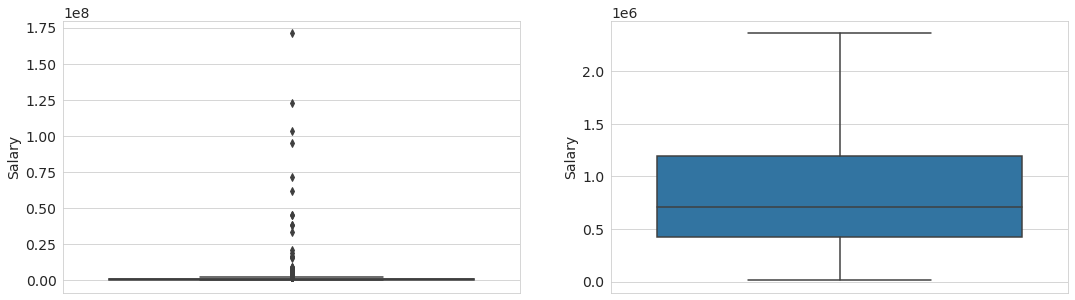

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (18,5))

sns.boxplot(y = salaries_df.Salary,
            ax = axes[0])

sns.boxplot(y = salaries_df.Salary,
            showfliers=False,
            ax = axes[1])

* The highest salaries are **way above the mean or median**.
* You cant even see the box plot with them included.
* The second box plot does give some insight with the highest salaries removed.
* It might be more insightful to know about the **distribution of all salaries** across a more realistic range.

### **Q. What is the distribution of salaries?**

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


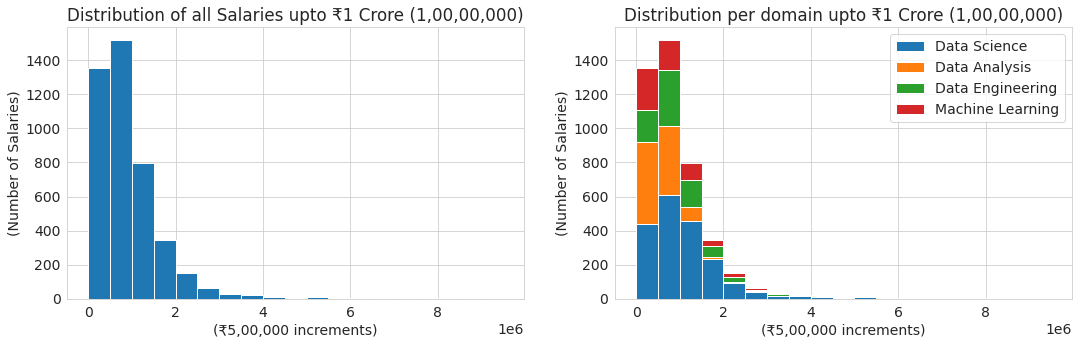

In [ ]:
ds_df = salaries_df[salaries_df.Field == 'Data Science']
da_df = salaries_df[salaries_df.Field == 'Data Analysis']
de_df = salaries_df[salaries_df.Field == 'Data Engineering']
ml_df = salaries_df[salaries_df.Field == 'Machine Learning']

fig, axes = plt.subplots(1,2, figsize = (18,5))

axes[0].hist(salaries_df.Salary, bins = np.arange(0,10000000,500000));
axes[0].set_title("Distribution of all Salaries upto ₹1 Crore (1,00,00,000)")
axes[0].set_xlabel("(₹5,00,000 increments)")
axes[0].set_ylabel("(Number of Salaries)")

axes[1].hist([ds_df.Salary,da_df.Salary, de_df.Salary, ml_df.Salary], 
         bins = np.arange(0,10000000,500000), 
         stacked=True);
axes[1].set_title("Distribution per domain upto ₹1 Crore (1,00,00,000)")
axes[1].set_xlabel("(₹5,00,000 increments)")
axes[1].set_ylabel("(Number of Salaries)")
axes[1].legend(['Data Science', 'Data Analysis', 'Data Engineering', 'Machine Learning']);

* **90-95%** of people are making under **₹20 Lakhs** (20,00,000).
* You can see how the highest salaries give a **skewed represntation** of the industry, while the reality is quite different.
* Its better to class the highest salaries as the **outliers** and **remove them** when making a general inference or statement.

### **Q. What is the average and median Salaries by Fields?**

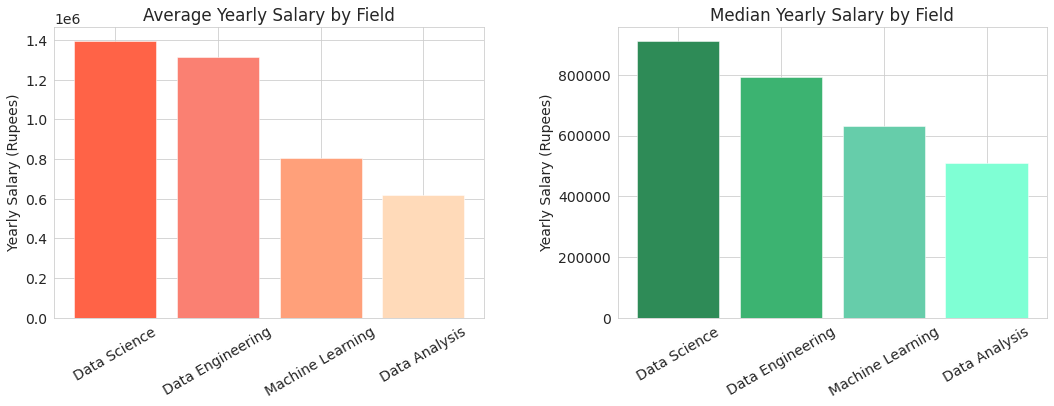

In [ ]:
mean_by_field = salaries_df.groupby('Field')[['Salary']].agg('mean').reset_index().sort_values('Salary', ascending=False)
median_by_field = salaries_df.groupby('Field')[['Salary']].agg('median').reset_index().sort_values('Salary', ascending=False)

fig, axes = plt.subplots(1,2, figsize = (16,7))

axes[0].bar(mean_by_field['Field'],
            mean_by_field['Salary'],
            linewidth='0.5',
            color  = ["tomato","salmon","lightsalmon","peachpuff"])
axes[0].set_ylabel('Yearly Salary (Rupees)')
axes[0].set_title('Average Yearly Salary by Field')
axes[0].tick_params('x', labelrotation=30)

axes[1].bar(median_by_field['Field'],
            median_by_field['Salary'],
            linewidth='0.5',           
            color  = ["seagreen","mediumseagreen","mediumaquamarine","aquamarine"])
axes[1].set_ylabel('Yearly Salary (Rupees)')
axes[1].set_title('Median Yearly Salary by Field')
axes[1].tick_params('x', labelrotation=30)

plt.tight_layout(pad = 4);

* Proffesionals in the **Data Science** field are making **significantly more** than people in the other domains.
* The median range from just under **₹10 lakhs - ₹5 lakhs** (10,00,000 - 5,00,000)
* Here it is **better to look at the median** yearly salary than the average.
* Because the **average is heavily affected by the outliers** inthe data, while the median is not.

### **Q. Which location pays the most salary?**

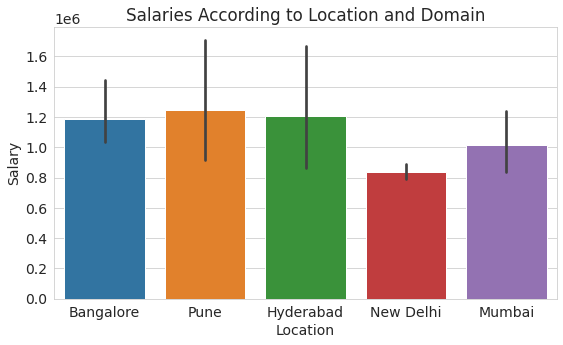

In [ ]:
plt.title('Salaries According to Location and Domain')

sns.barplot(x=salaries_df.Location,
            y=salaries_df.Salary,
            data = salaries_df);

* Looks like **Pune**, **Bangalore** and **Hyderabad** offer higher salaries, around ₹12 lakhs (12,00,000).
* But these values are being **affected by the outliers**, so the actual average might be slightly less

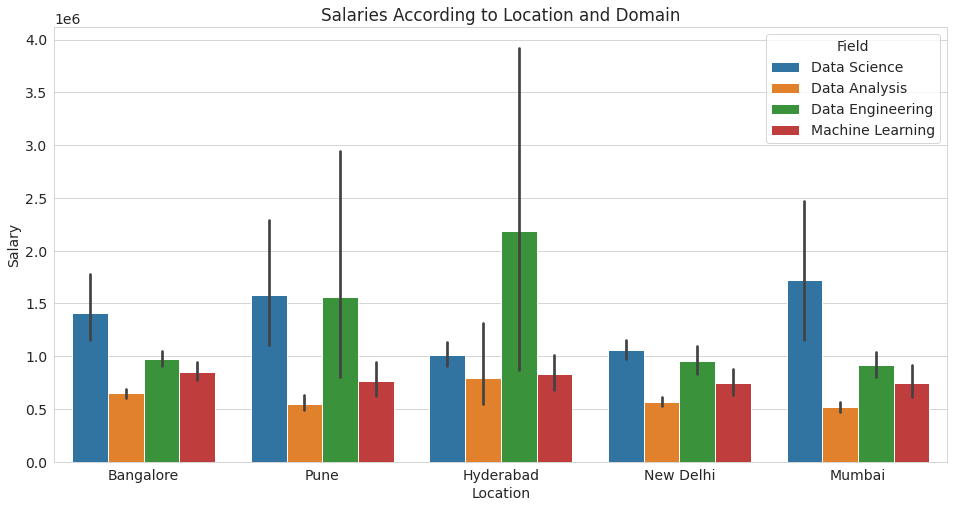

In [ ]:
plt.figure(figsize=(16, 8))
plt.title('Salaries According to Location and Domain')

sns.barplot(x=salaries_df.Location,
            y=salaries_df.Salary,
            hue=salaries_df.Field,
            data = salaries_df);

### **Q. What are the salaries according to the seniority level?**

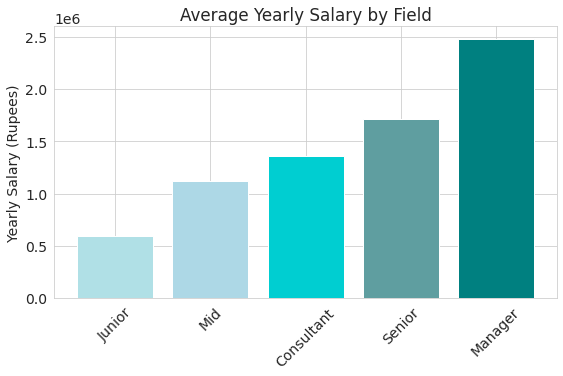

In [ ]:
mean_by_level = salaries_df.groupby(['Level'])[['Level','Salary']].agg('mean').reset_index().sort_values('Salary', ascending=True)
plt.bar(mean_by_level['Level'],
        mean_by_level['Salary'],
        color  = ["powderblue","lightblue","darkturquoise","cadetblue", "teal"])
plt.xlabel('')
plt.ylabel('Yearly Salary (Rupees)')
plt.title('Average Yearly Salary by Field')
plt.xticks(rotation='45')
plt.show()

* The **entry point** to jobs in the data space is around **₹6 lakhs** (6,00,00), though this might be slightly affected by the lowest yearly salaries, which were not jobs, but actually internships that paid only ₹5-10k per moth.
* If you work hard and become a **manager** or a **senior**, you can expect to earn in the range of **₹15-25 lakhs** (15,00,000 - 25,00,000).

## **Inferences and Conclusion**

* Here is the summary of the analysis done up until now:
    * There are a lot of jobs in the data industry, with companies like Amazon, Google, IBM, TCS etc. having a lot positions.
    * The general range of salaries (all levels) is about ₹6 - ₹25 Lakhs.
    * The jobs in the Data Science subdomain pay more than the other domains, while jobs in Data Analysis pay the least.
    * IT hubs like Pune, Bangalore and Hyderabad are great places to work in whith slightly higher pay than the other cites.
    * If you work hard and smartly, there is good growth in this industry with a substantial increase in pay as well.

## **References and Future Work**

* I think further analysis can be done on this dataset, and some more information can be squeezed out. 
* It would be very interesting to compare all of the findings of this analysis in the data domain, to another domians like cyber security, web development, software engineering etc.

* Course: https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas
* Dataset: https://www.kaggle.com/iamsouravbanerjee/analytics-industry-salaries-2022-india

In [ ]:
jovian.set_project('EDA_Industy_Salaries')
jovian.set_colab_id('1Wp2nHd6WyeTM8AHh9QHSO03a_D1bHB20')
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/aseemdandgaval1/eda-industy-salaries


'https://jovian.ai/aseemdandgaval1/eda-industy-salaries'